# Proximal Policy Optimisation Agent for Step Response

This notebook trains a [Proximal Policy Optimisation](https://arxiv.org/abs/1707.06347) agent to solve a step-response problem in the shared Bullet simulation. Since this type of agent allows for discrete as well as continuous action spaces, both variants have been tested.

A [Tensorboard](https://www.tensorflow.org/tensorboard) visualisation is hosted [**here**](http://0.0.0.0:6006/#scalars) in order to track training progress.

## Discrete Environment Setup and Start of Training Sequence

In [2]:
# Set matplotlib to inline mode and import necessary python components
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import os
import time
import sys
sys.path.append("/catkin_ws/src/jointcontrol/scripts")

# Import gym, the custom gym environment and the discrete env wrapper
import gym
import gym_jointcontrol
from discreteActionWrapper import *

# Import PPO1 implementation
# These imports will throw a lot of warnings, since we are using Python 3.7 instead of 3.8
from stable_baselines.common.policies import MlpPolicy
from stable_baselines import PPO1

# Instantiate gym environment and wrap it with the discrete action wrapper
env = jointcontrolDiscrete(
    gym.make('jointcontrol-v0', jointidx=0),
    discretisation = 0.5
)

# Start tensorboard to allow for visualisation of training process
os.system("tensorboard --logdir /training_tensorboard/ --host 0.0.0.0 --port 6006 &")

# Instantiate model and start training
# PPO1 example based on https://stable-baselines.readthedocs.io/en/master/modules/ppo1.html
model = PPO1(MlpPolicy, env, tensorboard_log="/training_tensorboard/", verbose=1)
model.learn(total_timesteps=10000)

pybullet build time: Dec  1 2021 18:33:04






Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

********** Iteration 0 ************


TensorBoard 1.15.0 at http://0.0.0.0:6006/ (Press CTRL+C to quit)



Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00093 |      -0.02890 |    6512.72656 |       0.00069 |       2.88966
     -0.02133 |      -0.02886 |    6398.72168 |       0.00395 |       2.88639
     -0.03598 |      -0.02880 |    6290.30957 |       0.01034 |       2.88007
     -0.04093 |      -0.02874 |    6182.44824 |       0.01638 |       2.87416
Evaluating losses...
     -0.04509 |      -0.02872 |    6115.08594 |       0.01873 |       2.87186
----------------------------------
| EpLenMean       | 41           |
| EpRewMean       | -263         |
| EpThisIter      | 6            |
| EpisodesSoFar   | 6            |
| TimeElapsed     | 5.67         |
| TimestepsSoFar  | 256          |
| ev_tdlam_before | -0.00417     |
| loss_ent        | 2.8718581    |
| loss_kl         | 0.018725365  |
| loss_pol_entpen | -0.028718581 |
| loss_pol_surr   | -0.045089763 |
| loss_vf_loss    | 6115.086     |
----------------------------------
******

W0213 15:23:57.826008 139887250581248 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.


## Test trained Model

The trained model can then be tested using the controllerTest module from the jointcontrol package. This module allows for step response and stability testing of the resulting controller and generates a test report.

Testepisode done. Resulting params are [35.    0.05  0.    0.05  0.    0.45  0.    0.    0.  ]
{'lowerSignal': 0, 'higherSignal': -1.57, 'pulseLength': 100, 'numPulses': 2, 'maxSteps': 40}
{'lowerSignal': 0, 'higherSignal': -1.57, 'pulseLength': 20, 'numPulses': 10, 'maxSteps': 40}
{'lowerSignal': 0, 'higherSignal': -1.57, 'pulseLength': 10, 'numPulses': 20, 'maxSteps': 40}
{'lowerSignal': 0, 'higherSignal': -1.57, 'pulseLength': 5, 'numPulses': 40, 'maxSteps': 40}
{'lowerSignal': 0, 'higherSignal': -1.57, 'pulseLength': 2, 'numPulses': 100, 'maxSteps': 40}


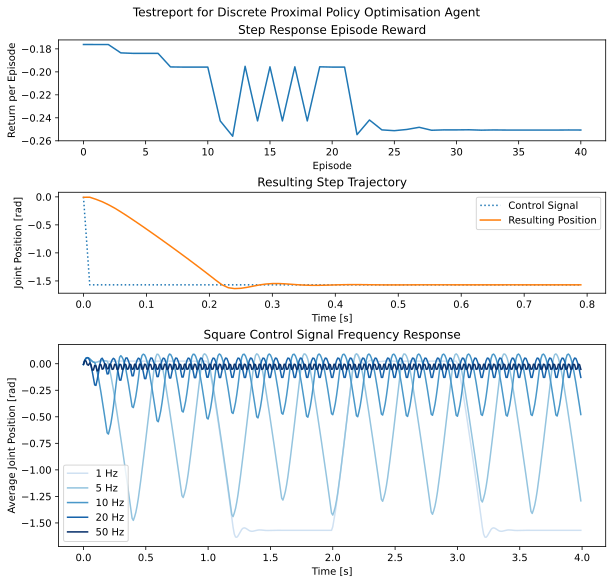

In [4]:
# Import controllerTest module from jointcontrol package
from controllerTest import *

# Reset environment, instantiate controllerTest and visualise results
env.reset()
test = controllerTest(env, model, "Discrete Proximal Policy Optimisation Agent")
test.plotResults(gui=True)

<center>____________________________________________________________________________________________________________________________</center>

## Continuous Environment Setup and Start of Training Sequence

Training and testing of the agent using a continuous action space is performed similarly to the discrete testing. Contrary to the prior training sequence, the environment is not wrapped using the discreteActionWrapper.

In [5]:
import os
import time
import sys
sys.path.append("/catkin_ws/src/jointcontrol/scripts")

# Import gym, the custom gym environment and the discrete env wrapper
import gym
import gym_jointcontrol

# Import PPO1 implementation
# These imports will throw a lot of warnings, since we are using Python 3.7 instead of 3.8
from stable_baselines.common.policies import MlpPolicy
from stable_baselines import PPO1

# Instantiate gym environment
env = gym.make('jointcontrol-v0', jointidx=0)

# Start tensorboard to allow for visualisation of training process
os.system("tensorboard --logdir /training_tensorboard/ --host 0.0.0.0 --port 6006 &")

# Instantiate model and start training
# PPO1 example based on https://stable-baselines.readthedocs.io/en/master/modules/ppo1.html
model = PPO1(MlpPolicy, env, tensorboard_log="/training_tensorboard/", verbose=1)
model.learn(total_timesteps=10000)


********** Iteration 0 ************


W0213 15:35:14.033842 140176737007360 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
E0213 15:35:14.172274 140178961516352 program.py:228] TensorBoard could not bind to port 6006, it was already in use
ERROR: TensorBoard could not bind to port 6006, it was already in use


Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00545 |      -0.12770 |    7964.85791 |       0.00396 |      12.76991
     -0.01190 |      -0.12769 |    7846.66504 |       0.01452 |      12.76949
     -0.02649 |      -0.12769 |    7726.93311 |       0.01915 |      12.76904
     -0.03759 |      -0.12770 |    7611.36621 |       0.01950 |      12.76959
Evaluating losses...
     -0.04275 |      -0.12770 |    7539.34961 |       0.01981 |      12.77029
----------------------------------
| EpLenMean       | 41           |
| EpRewMean       | -318         |
| EpThisIter      | 6            |
| EpisodesSoFar   | 6            |
| TimeElapsed     | 5.75         |
| TimestepsSoFar  | 256          |
| ev_tdlam_before | 0.00424      |
| loss_ent        | 12.770287    |
| loss_kl         | 0.019807652  |
| loss_pol_entpen | -0.12770286  |
| loss_pol_surr   | -0.042752147 |
| loss_vf_loss    | 7539.3496    |
----------------------------------
*******

W0213 15:39:04.021717 139887250581248 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.


Testepisode done. Resulting params are [26.03750661  0.50096476  0.27418585  7.5         0.51801547  0.04087289
  0.          0.0845191   0.05295154]
{'lowerSignal': 0, 'higherSignal': -1.57, 'pulseLength': 100, 'numPulses': 2, 'maxSteps': 40}
{'lowerSignal': 0, 'higherSignal': -1.57, 'pulseLength': 20, 'numPulses': 10, 'maxSteps': 40}
{'lowerSignal': 0, 'higherSignal': -1.57, 'pulseLength': 10, 'numPulses': 20, 'maxSteps': 40}
{'lowerSignal': 0, 'higherSignal': -1.57, 'pulseLength': 5, 'numPulses': 40, 'maxSteps': 40}
{'lowerSignal': 0, 'higherSignal': -1.57, 'pulseLength': 2, 'numPulses': 100, 'maxSteps': 40}


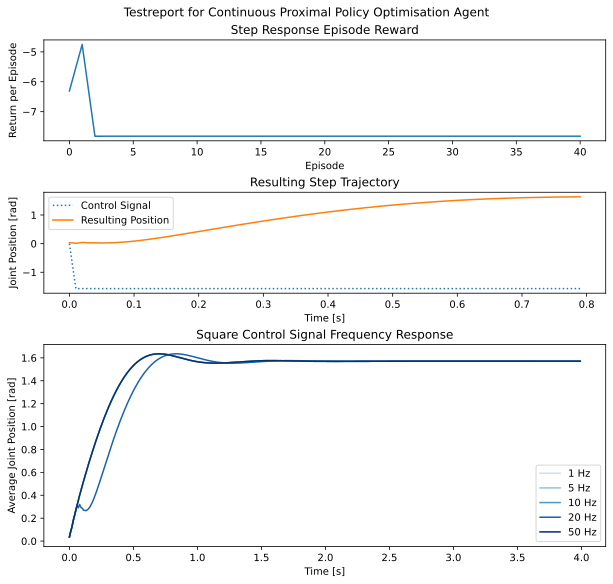

In [6]:
# Import controllerTest module from jointcontrol package
from controllerTest import *

# Reset environment, instantiate controllerTest and visualise results
env.reset()
test = controllerTest(env, model, "Continuous Proximal Policy Optimisation Agent")
test.plotResults(gui=True)

<center>____________________________________________________________________________________________________________________________</center>
<center><a href="../documentation.html">Main Page</a></center>